# Лабораторная работа 3
### Scikit-learn Supervised ML (Машинное обучение с учителем)
![Image of Scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png)

1. Прочитайте очень простое введение о машинном обучении с учителем: https://ru.wikipedia.org/wiki/Обучение_с_учителем
2. Более подробное описание есть здесь: http://www.machinelearning.ru/wiki/index.php?title=Обучение_с_учителем
3. Основные методы Supervised ML:
    * Байесовские классификаторы
    * Нейронные сети
    * Решающие деревья и леса
    * Композиции в виде взвешенных голосований, бустингов, бэггингов
    * Линейная регрессия
4. В данной работе будут рассмотрены только регрессионные модели, методы классификации Вы можете найти по ссылке внизу

Документация scikit-learn по Supervised методам: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = datasets.load_diabetes() # загрузим данные
Y, X = data['target'], data['data'].T
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # признаки в датасете
X.shape , Y.shape

((10, 442), (442,))

## 1. Постройте графики зависимостей target (Y) от признаков (X) как единый plot с использованием команды plt.subplot

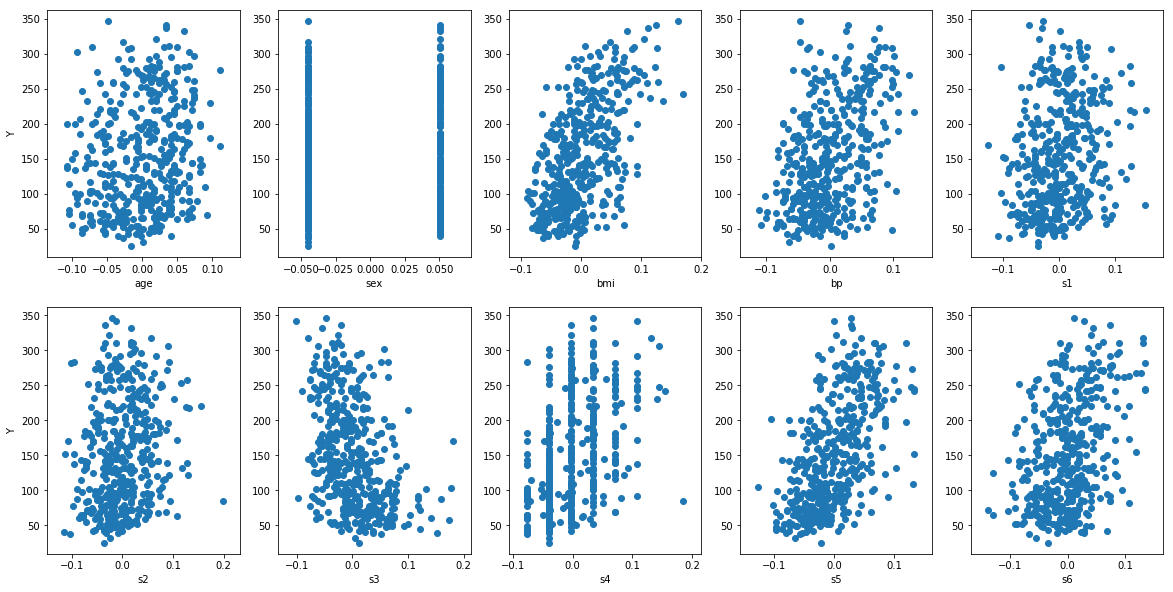

In [10]:
A = dict(enumerate(X))
fig, aa= plt.subplots(2,5,figsize=(20,10))
i = 0;k = 0

aa[0][0].set_ylabel('Y')
aa[1][0].set_ylabel('Y')
for i in range(0,2):
    j = 0
    for j in range(0,5):
        aa[i][j].scatter(A[k], Y)
        aa[i][j].set_xlabel(features[k])
        j = j+1
        k = k+1
    i =+1
plt.show()

## 2. Линейные модели

[949.43526038 152.13348416]
0.3439237602253803


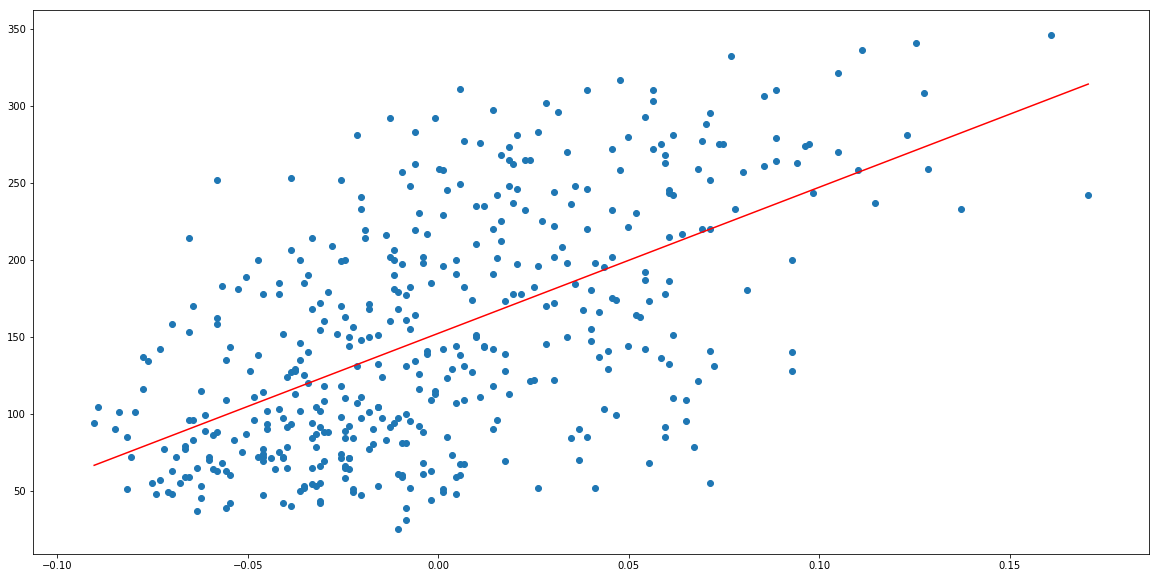

In [11]:
from sklearn import linear_model

feature = 2 # номер признака

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit([[x, 1] for x in X[feature]], Y) # обучим регрессию k*x + b*1, метод осуществит подбор коэффциентов k и b
print(reg.coef_) # вывести коэффициенты
print(reg.score([[x, 1] for x in X[feature]], Y)) # вывести score

points = np.linspace(X[feature].min(), X[feature].max(), 100) # вы берем значения для предсказания
target = [np.sum(reg.coef_*[x, 1]) for x in points] # предсказания модели

plt.figure(figsize=(20, 10))
plt.scatter(X[feature], Y)
plt.plot(points, target, c='r')
plt.show()

## 3. Постройте полиномиальную модель 4 степени с использованием второго признака для предсказания Y. Полином выглядит так: ax^4 + bx^3 + ... + b = Y

[114576.32206995 -25895.11668061    412.54705785   1055.27334075
    151.05466919]
0.3455949866318273


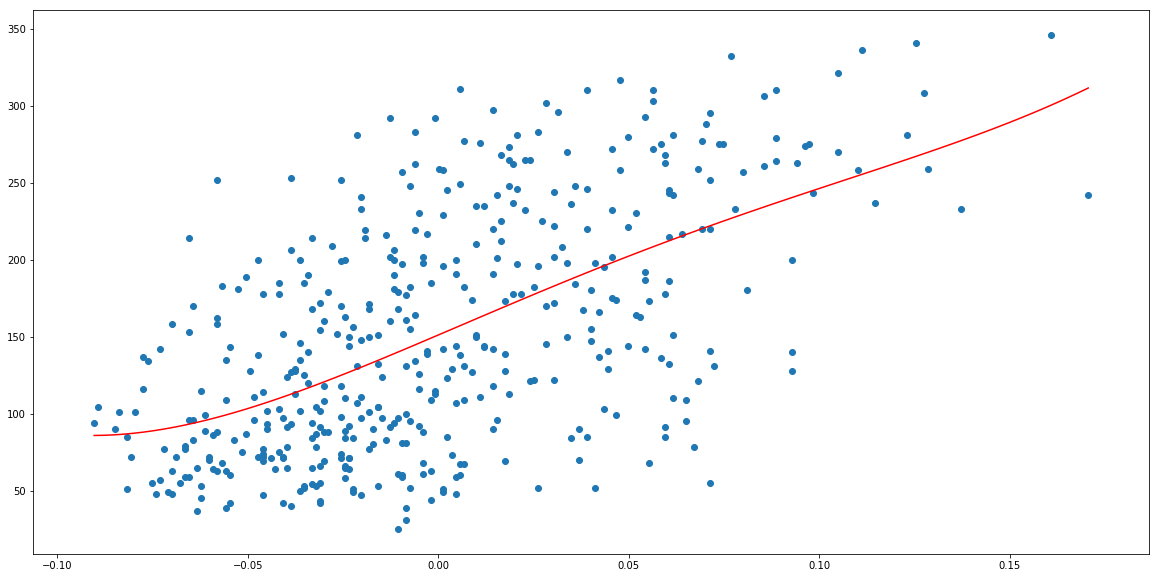

In [12]:
feature = 2

reg = linear_model.LinearRegression(fit_intercept=False)
# Ваш код
reg.fit([[x**4, x**3, x**2, x, 1] for x in X[feature]], Y)
print(reg.coef_)
print(reg.score([[x**4, x**3, x**2, x, 1] for x in X[feature]], Y))

points = np.linspace(X[feature].min(), X[feature].max(), 100)
target = [np.sum(reg.coef_*[x**4, x**3, x**2, x, 1]) for x in points]

plt.figure(figsize=(20, 10))
plt.scatter(X[feature], Y)
plt.plot(points, target, c='r')
plt.show()

## 4. Постройте полиномиальную модель с использованием трех любых признаков и выведите метрику MAE (Mean Absolute Error) 

In [14]:
import itertools
Xl = X[[1,2,3]]
xt = [[(x1**4)*x2, (x3**3)*x1, (x2**2)*x1, x1*x2, 1] for x3,x2,x1 in zip(Xl[1], Xl[2], Xl[0])]
reg1 = linear_model.LinearRegression(fit_intercept=False)
# Ваш код
reg1.fit(xt, Y)
print(reg.coef_)
print(reg.score(xt, Y))

[114576.32206995 -25895.11668061    412.54705785   1055.27334075
    151.05466919]
0.0021770179445983473


## 5. SVM и tree модели. С использованием метода svm.SVR и tree.DecisionTreeRegressor постройте модели с использованием метода опорных векторов и деревьев принятия решений. Выведите среднее значение вектора Y и MAE построенных моделей. Для обучения и тестирования независимые выборки.

In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y, test_size=0.4, random_state=0) 
# Ваш код
svm_poly_reg = SVR(kernel="poly", gamma='auto', C =1, epsilon=0.1).fit(X_train, Y_train)
print(svm_poly_reg.score(X_test, Y_test))
__Y = svm_poly_reg.predict(X_test)
print(np.average(__Y))
MAE_SVR = 0
for i in range(0, len(Y_test)):
    MAE_SVR = MAE_SVR + (Y_test[i] - __Y[i])
MAE_SVR = MAE_SVR/len(Y_test)
print(MAE_SVR)

-0.022389017257715693
140.90000001910084
10.862711845305919


In [16]:
from sklearn.tree import DecisionTreeRegressor
# Ваш код
regressor = DecisionTreeRegressor(random_state=0).fit(X_train, Y_train)
print(regressor.score(X_test, Y_test))
__Y_tree = regressor.predict(X_test)
print(np.average(__Y_tree))
MAE_SVR_tree = 0
for i in range(0, len(Y_test)):
    MAE_SVR_tree = MAE_SVR_tree + (Y_test[i] - __Y_tree[i])
MAE_SVR_tree = MAE_SVR_tree/len(Y_test)
print(MAE_SVR_tree)

-0.19039804605161348
154.49717514124293
-2.7344632768361583


## 6. Используйте 5-fold кросс-валидацию для обучения любой понравившейся Вам модели (https://scikit-learn.org/stable/modules/cross_validation.html). Выведите метрики тестов для каждого получившегося набора (должно получится 5 независимых друг от друга метрик).

In [17]:
# Ваш код
from sklearn.model_selection import cross_val_score 
from sklearn import metrics
scores = cross_val_score(svm_poly_reg, X.T, Y, cv=5, scoring='neg_mean_absolute_error')
scores

array([-57.38314577, -68.78089858, -66.10227247, -63.29545422,
       -70.43181796])